In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import ttest_ind

In [2]:
# Read dataset
df=pd.read_csv("data.csv")

In [3]:
# Display Dataset
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [4]:
# Display information about dataset
# Begin of data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
# Drop columns that will not contribute to the model.
df.drop(columns=['Unnamed: 0', 'offer_description', 'registration_date'], inplace=True)

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                         166
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
dtype: int64

In [6]:
# Fill in empty categorical data (color) with unknown
df['color'] = df['color'].fillna('unknown')

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                           0
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
dtype: int64

In [7]:
# Converting numeric objects to numeric variables
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(r'-.*', pd.NA, regex=True)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(' g/km', '', regex=False)
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

df['price_in_euro'] = df['price_in_euro'].str.replace(' €', '', regex=False)
df['price_in_euro'] = df['price_in_euro'].str.replace('.', '', regex=False)
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')

df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                           0
year                            0
price_in_euro                 199
power_kw                      293
power_ps                      210
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    29172
fuel_consumption_g_km       42250
mileage_in_km                 152
dtype: int64

In [8]:
# Fill missing numeric values with the mean
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].mean())
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].mean())
df['price_in_euro'] = df['price_in_euro'].fillna(df['price_in_euro'].mean())
df['power_kw'] = df['power_kw'].fillna(df['power_kw'].mean())
df['power_ps'] = df['power_ps'].fillna(df['power_ps'].mean())
df['mileage_in_km'] = df['mileage_in_km'].fillna(df['mileage_in_km'].mean())

# Display total null value number column by column
df.isnull().sum()

brand                       0
model                       0
color                       0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
dtype: int64

In [ ]:
# Find 5 most used color
top5_colors = df['color'].value_counts().nlargest(5).index

# Replace rest with others
df['color'] = df['color'].apply(lambda x: x if x in top5_colors else 'others')


In [ ]:
# Find 5 most used brand
top5_brands = df['brand'].value_counts().nlargest(5).index

# Replace rest with others
df['brand'] = df['brand'].apply(lambda x: x if x in top5_brands else 'others')


In [ ]:
# Find 5 most used model
top5_models = df['model'].value_counts().nlargest(5).index

# Replace rest with others
df['model'] = df['model'].apply(lambda x: x if x in top5_models else 'others')

In [ ]:
# Convert null values with median 
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['year'] = df['year'].fillna(df['year'].median())


In [ ]:
# Find 5 most used fuel
top5_fuels = df['fuel_type'].value_counts().nlargest(5).index

# Replace rest with others
df['fuel_type'] = df['fuel_type'].apply(lambda x: x if x in top5_fuels else 'others')

In [ ]:
# display unique values

print(f"Unique values")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Unique values
brand: 6
model: 6
color: 6
year: 33
price_in_euro: 18081
power_kw: 512
power_ps: 521
transmission_type: 4
fuel_type: 6
fuel_consumption_l_100km: 268
fuel_consumption_g_km: 492
mileage_in_km: 71767


In [ ]:
# Replace object values with numeric values

le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['color'])
df['brand_encoded'] = le.fit_transform(df['brand'])
df['model_encoded'] = le.fit_transform(df['model'])
df['fuel_type_encoded'] = le.fit_transform(df['fuel_type'])
df['transmission_type_encoded'] = le.fit_transform(df['transmission_type'])


df = df.drop('color', axis=1)
df = df.drop('brand', axis=1)
df = df.drop('model', axis=1)
df = df.drop('fuel_type', axis=1)
df = df.drop('transmission_type', axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       251079 non-null  float64
 1   price_in_euro              251079 non-null  float64
 2   power_kw                   251079 non-null  float64
 3   power_ps                   251079 non-null  float64
 4   fuel_consumption_l_100km   251079 non-null  float64
 5   fuel_consumption_g_km      251079 non-null  float64
 6   mileage_in_km              251079 non-null  float64
 7   color_encoded              251079 non-null  int64  
 8   brand_encoded              251079 non-null  int64  
 9   model_encoded              251079 non-null  int64  
 10  fuel_type_encoded          251079 non-null  int64  
 11  transmission_type_encoded  251079 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 MB


In [ ]:



# 1) Prepare target: bin year for classification

bins = [0, 2000, 2010, 2020, df['year'].max()]
labels = ['Before 2000', '2000-2010', '2010-2020', 'After 2020']
df['year_category'] = pd.cut(df['year'], bins=bins, labels=labels, include_lowest=True)

# Drop rows with NaN in year
df = df.dropna(subset=['year'])

# Features & target
feature_cols = [col for col in df.columns if col not in ['year', 'year_category']]
X = df[feature_cols]
y = df['year_category']



# Encode target labels
y_encoded = le.fit_transform(y)

# Describe features
feature_descriptions = {col: "Description of " + col for col in feature_cols}
feature_types = {col: str(X[col].dtype) for col in feature_cols}


In [18]:



# 2) Feature selection methods

# a) Mutual Information
mi = mutual_info_classif(X, y_encoded)
# b) ANOVA F-value
f_val, _ = f_classif(X, y_encoded)
# c) Random Forest Feature Importance
rf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fs.fit(X, y_encoded)
rf_importance = rf_fs.feature_importances_

# Combine into DataFrame
fs_df = pd.DataFrame({
    'Feature': feature_cols,
    'Description': [feature_descriptions[f] for f in feature_cols],
    'Mutual Information': mi,
    'ANOVA F-value': f_val,
    'RF Importance': rf_importance
}).sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

print("Feature Selection Table:")
print(fs_df)

Feature Selection Table:
                      Feature                               Description  \
0               mileage_in_km              Description of mileage_in_km   
1               price_in_euro              Description of price_in_euro   
2                    power_ps                   Description of power_ps   
3                    power_kw                   Description of power_kw   
4       fuel_consumption_g_km      Description of fuel_consumption_g_km   
5    fuel_consumption_l_100km   Description of fuel_consumption_l_100km   
6           fuel_type_encoded          Description of fuel_type_encoded   
7               brand_encoded              Description of brand_encoded   
8               color_encoded              Description of color_encoded   
9               model_encoded              Description of model_encoded   
10  transmission_type_encoded  Description of transmission_type_encoded   

    Mutual Information  ANOVA F-value  RF Importance  
0             0.458

In [ ]:
# 3) Classification experiments

# Define models to try
models = {
    'Naive Bayes': GaussianNB(),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Select subsets of features 
top_features_sets = {
    'All Features': feature_cols,
    'Top 5 MI Features': fs_df['Feature'].head(5).tolist(),
    'Top 8 MI Features': fs_df['Feature'].head(8).tolist()
}

# Stratified 10-fold CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results for summary table and for t-test
results = []

for model_name, model in models.items():
    for subset_name, features_subset in top_features_sets.items():
        acc_scores = []
        f1_macro_scores = []
        f1_micro_scores = []
        auc_scores = []
        
        for train_index, test_index in skf.split(X, y_encoded):
            X_train, X_test = X.iloc[train_index][features_subset], X.iloc[test_index][features_subset]
            y_train, y_test = y_encoded[train_index], y_encoded[test_index]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            acc_scores.append(accuracy_score(y_test, y_pred))
            f1_macro_scores.append(f1_score(y_test, y_pred, average='macro'))
            f1_micro_scores.append(f1_score(y_test, y_pred, average='micro'))
            
            # AUC needs binarized output for multiclass - compute average one-vs-rest AUC
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)
                try:
                    auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
                except:
                    auc_score = np.nan
            else:
                auc_score = np.nan
            auc_scores.append(auc_score)
        
        # Save mean scores for this experiment
        results.append({
            'Experiment': f'{model_name} with {subset_name}',
            'Accuracy': np.mean(acc_scores),
            'F1-macro': np.mean(f1_macro_scores),
            'F1-micro': np.mean(f1_micro_scores),
            'AUC': np.nanmean(auc_scores)
        })

# Results dataframe
results_df = pd.DataFrame(results)
print("\nClassification Experiments Results:")
print(results_df)


Classification Experiments Results:
                             Experiment  Accuracy  F1-macro  F1-micro  \
0         Naive Bayes with All Features  0.493518  0.381785  0.493518   
1    Naive Bayes with Top 5 MI Features  0.780240  0.550361  0.780240   
2    Naive Bayes with Top 8 MI Features  0.492407  0.380811  0.492407   
3          k-NN (k=5) with All Features  0.832336  0.601099  0.832336   
4     k-NN (k=5) with Top 5 MI Features  0.832272  0.601037  0.832272   
5     k-NN (k=5) with Top 8 MI Features  0.832332  0.601096  0.832332   
6       Random Forest with All Features  0.918575  0.820048  0.918575   
7  Random Forest with Top 5 MI Features  0.895495  0.741932  0.895495   
8  Random Forest with Top 8 MI Features  0.916469  0.816174  0.916469   

        AUC  
0  0.885176  
1  0.870265  
2  0.884861  
3  0.839185  
4  0.839114  
5  0.839181  
6  0.985632  
7  0.965456  
8  0.984123  


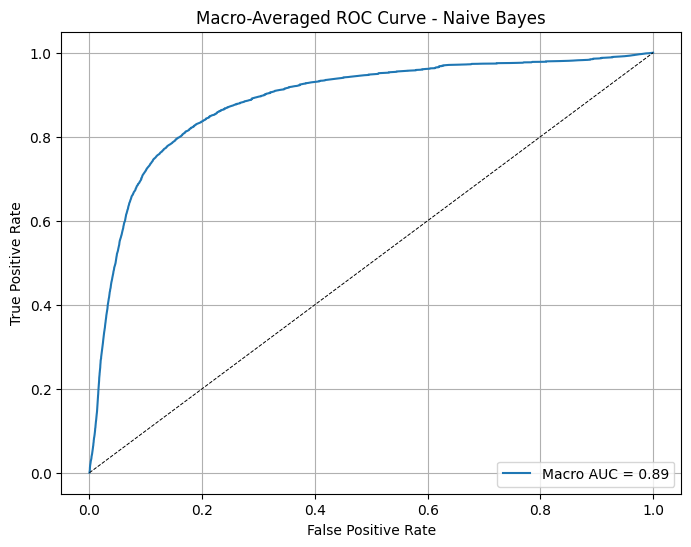

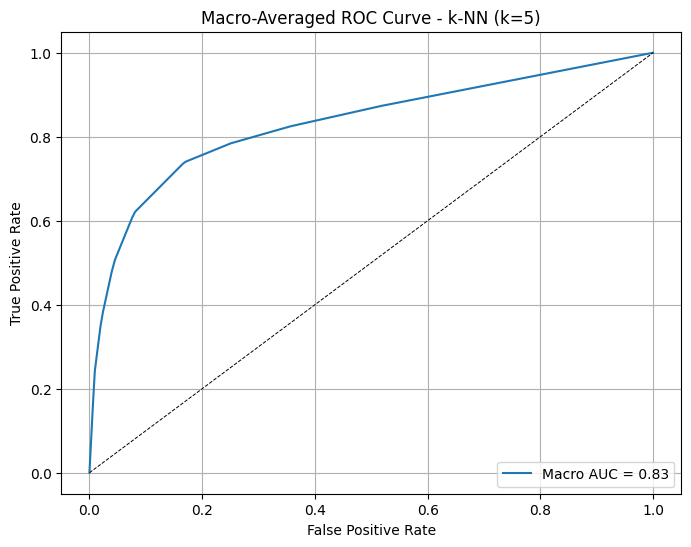

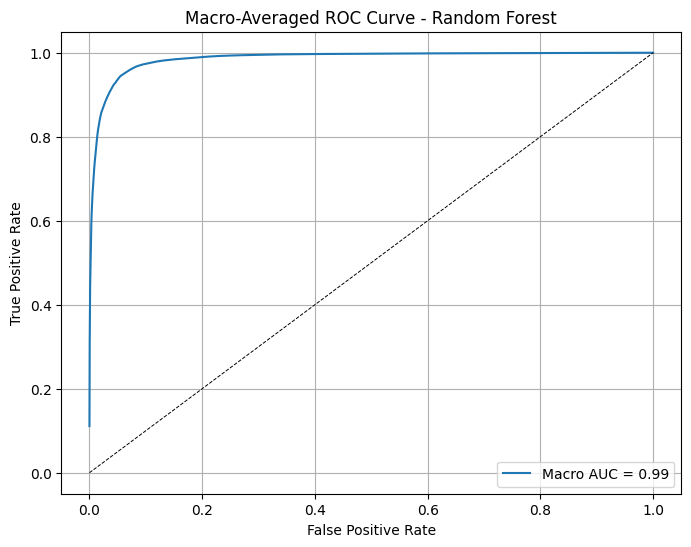

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Use one fold (first split) for fair comparison
train_index, test_index = next(skf.split(X, y_encoded))
X_train_full, X_test_full = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y_encoded[train_index], y_encoded[test_index]

# Binarize the test labels for macro-average ROC
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
n_classes = y_test_bin.shape[1]

for model_name, model in models.items():
    # Get feature subset for this model
    subset_name = None
    for exp in results_df['Experiment']:
        if model_name in exp:
            subset_name = exp.split(' with ')[1]
            break
    if subset_name is None:
        continue

    selected_features = top_features_sets[subset_name]
    X_train = X_train_full[selected_features]
    X_test = X_test_full[selected_features]

    # Train and predict probabilities
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)

    # Binarize predicted scores if necessary
    if y_score.shape[1] != n_classes:
        continue  # skip if the model didn’t output all classes

    # Compute ROC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot ROC curve for this model only
    plt.figure(figsize=(8, 6))
    plt.plot(all_fpr, mean_tpr, label=f'Macro AUC = {macro_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.7)
    plt.title(f'Macro-Averaged ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()



Confusion Matrix for Naive Bayes:
[[3304  233   84    5]
 [7476 3247 4685    5]
 [  55  128 5594    0]
 [ 249   34    7    2]]


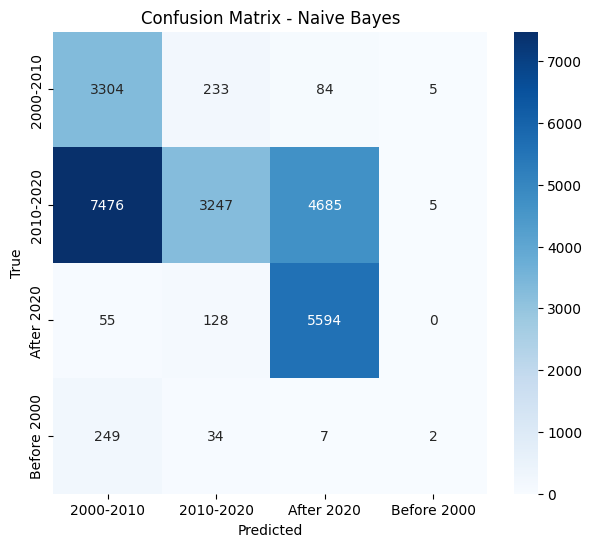


Confusion Matrix for k-NN (k=5):
[[ 2287  1306    12    21]
 [  726 13805   881     1]
 [    1  1029  4747     0]
 [  175   113     1     3]]


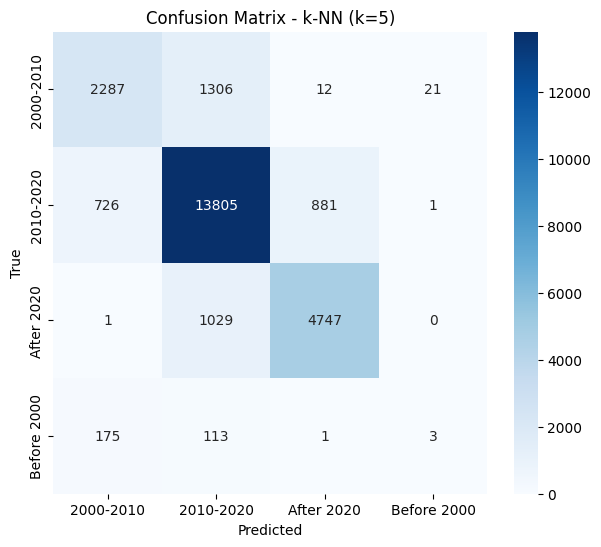


Confusion Matrix for Random Forest:
[[ 3104   495     1    26]
 [  346 14593   473     1]
 [    1   572  5204     0]
 [  148    19     0   125]]


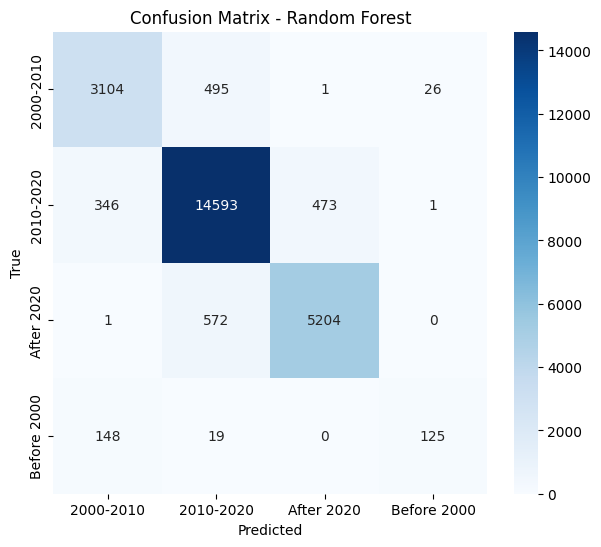

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


for model_name, model in models.items():
    # Get feature subset for this model
    subset_name = None
    for exp in results_df['Experiment']:
        if model_name in exp:
            subset_name = exp.split(' with ')[1]
            break
    if subset_name is None:
        continue

    selected_features = top_features_sets[subset_name]
    X_test_model = X_test[selected_features]

    # Fit model on training data with these features before predicting
    X_train_model = X_train_full[selected_features]
    model.fit(X_train_model, y_train)

    y_pred = model.predict(X_test_model)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [ ]:


# 6) Statistical significance testing (t-test) between best two models

# Get top 2 models by F1-macro
top_two = results_df.sort_values(by='F1-macro', ascending=False).head(2)

# To perform t-test, we must keep fold-level scores during CV

def get_cv_fold_scores(model, features_subset):
    acc_scores = []
    f1_macro_scores = []
    f1_micro_scores = []
    auc_scores = []
    
    for train_index, test_index in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_index][features_subset], X.iloc[test_index][features_subset]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_macro_scores.append(f1_score(y_test, y_pred, average='macro'))
        f1_micro_scores.append(f1_score(y_test, y_pred, average='micro'))
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            try:
                auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
            except:
                auc_score = np.nan
        else:
            auc_score = np.nan
        auc_scores.append(auc_score)
    
    return acc_scores, f1_macro_scores, f1_micro_scores, auc_scores

# Extract top two models info
model1_name, subset1 = top_two.iloc[0]['Experiment'].split(' with ')
model2_name, subset2 = top_two.iloc[1]['Experiment'].split(' with ')

model1 = models[model1_name]
model2 = models[model2_name]

features1 = top_features_sets[subset1]
features2 = top_features_sets[subset2]

# Get fold-level scores
m1_acc, m1_f1macro, m1_f1micro, m1_auc = get_cv_fold_scores(model1, features1)
m2_acc, m2_f1macro, m2_f1micro, m2_auc = get_cv_fold_scores(model2, features2)

# Perform t-tests for metrics
metrics = ['Accuracy', 'F1-macro', 'F1-micro', 'AUC']
for m1_scores, m2_scores, metric in zip([m1_acc, m1_f1macro, m1_f1micro, m1_auc],
                                       [m2_acc, m2_f1macro, m2_f1micro, m2_auc],
                                       metrics):
    t_stat, p_val = ttest_ind(m1_scores, m2_scores, nan_policy='omit')
    print(f"T-test for {metric}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"--> Significant difference in {metric}")
    else:
        print(f"--> No significant difference in {metric}")


T-test for Accuracy: t-statistic = 2.876, p-value = 0.0100
--> Significant difference in Accuracy
T-test for F1-macro: t-statistic = 0.747, p-value = 0.4645
--> No significant difference in F1-macro
T-test for F1-micro: t-statistic = 2.876, p-value = 0.0100
--> Significant difference in F1-micro
T-test for AUC: t-statistic = 2.527, p-value = 0.0211
--> Significant difference in AUC
